# Pre-Testing

### Day 1 
A lot has been going on during the winter break. Now it's time to gain a better understanding of the Different teams!

The aim is to pick two drivers for each day and analyze them. 

For the First Day i'll go with Magnussen from the team HAAS and with Tsunoda from RB aka. Visa Cash App RB Formula One Team

In [38]:
import numpy as np
import fastf1
import pandas as pd 
import matplotlib.pyplot as plt
from fastf1.core import Laps
from timple.timedelta import strftimedelta
import sys
sys.path.insert(0, "../")
from settings import CACHE_FOLDER_PATH
from utlis import *
sys.dont_write_bytecode = True

In [39]:
# Enable caching
ff1.Cache.enable_cache(CACHE_FOLDER_PATH)

In [49]:
session = fastf1.get_testing_session(2024,1,1)
circuit_info = fastf1.get_session(2024,'Barhain', 'Q')
circuit_info.load()
session.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.2.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data 

### The Track

The Code I've taken directly from the [FastF1 Documentation](https://docs.fastf1.dev/)


In [51]:
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()
circuit_info = circuit_info.get_circuit_info()

TypeError: can't compare offset-naive and offset-aware datetimes

In [33]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

AttributeError: 'Session' object has no attribute 'rotation'

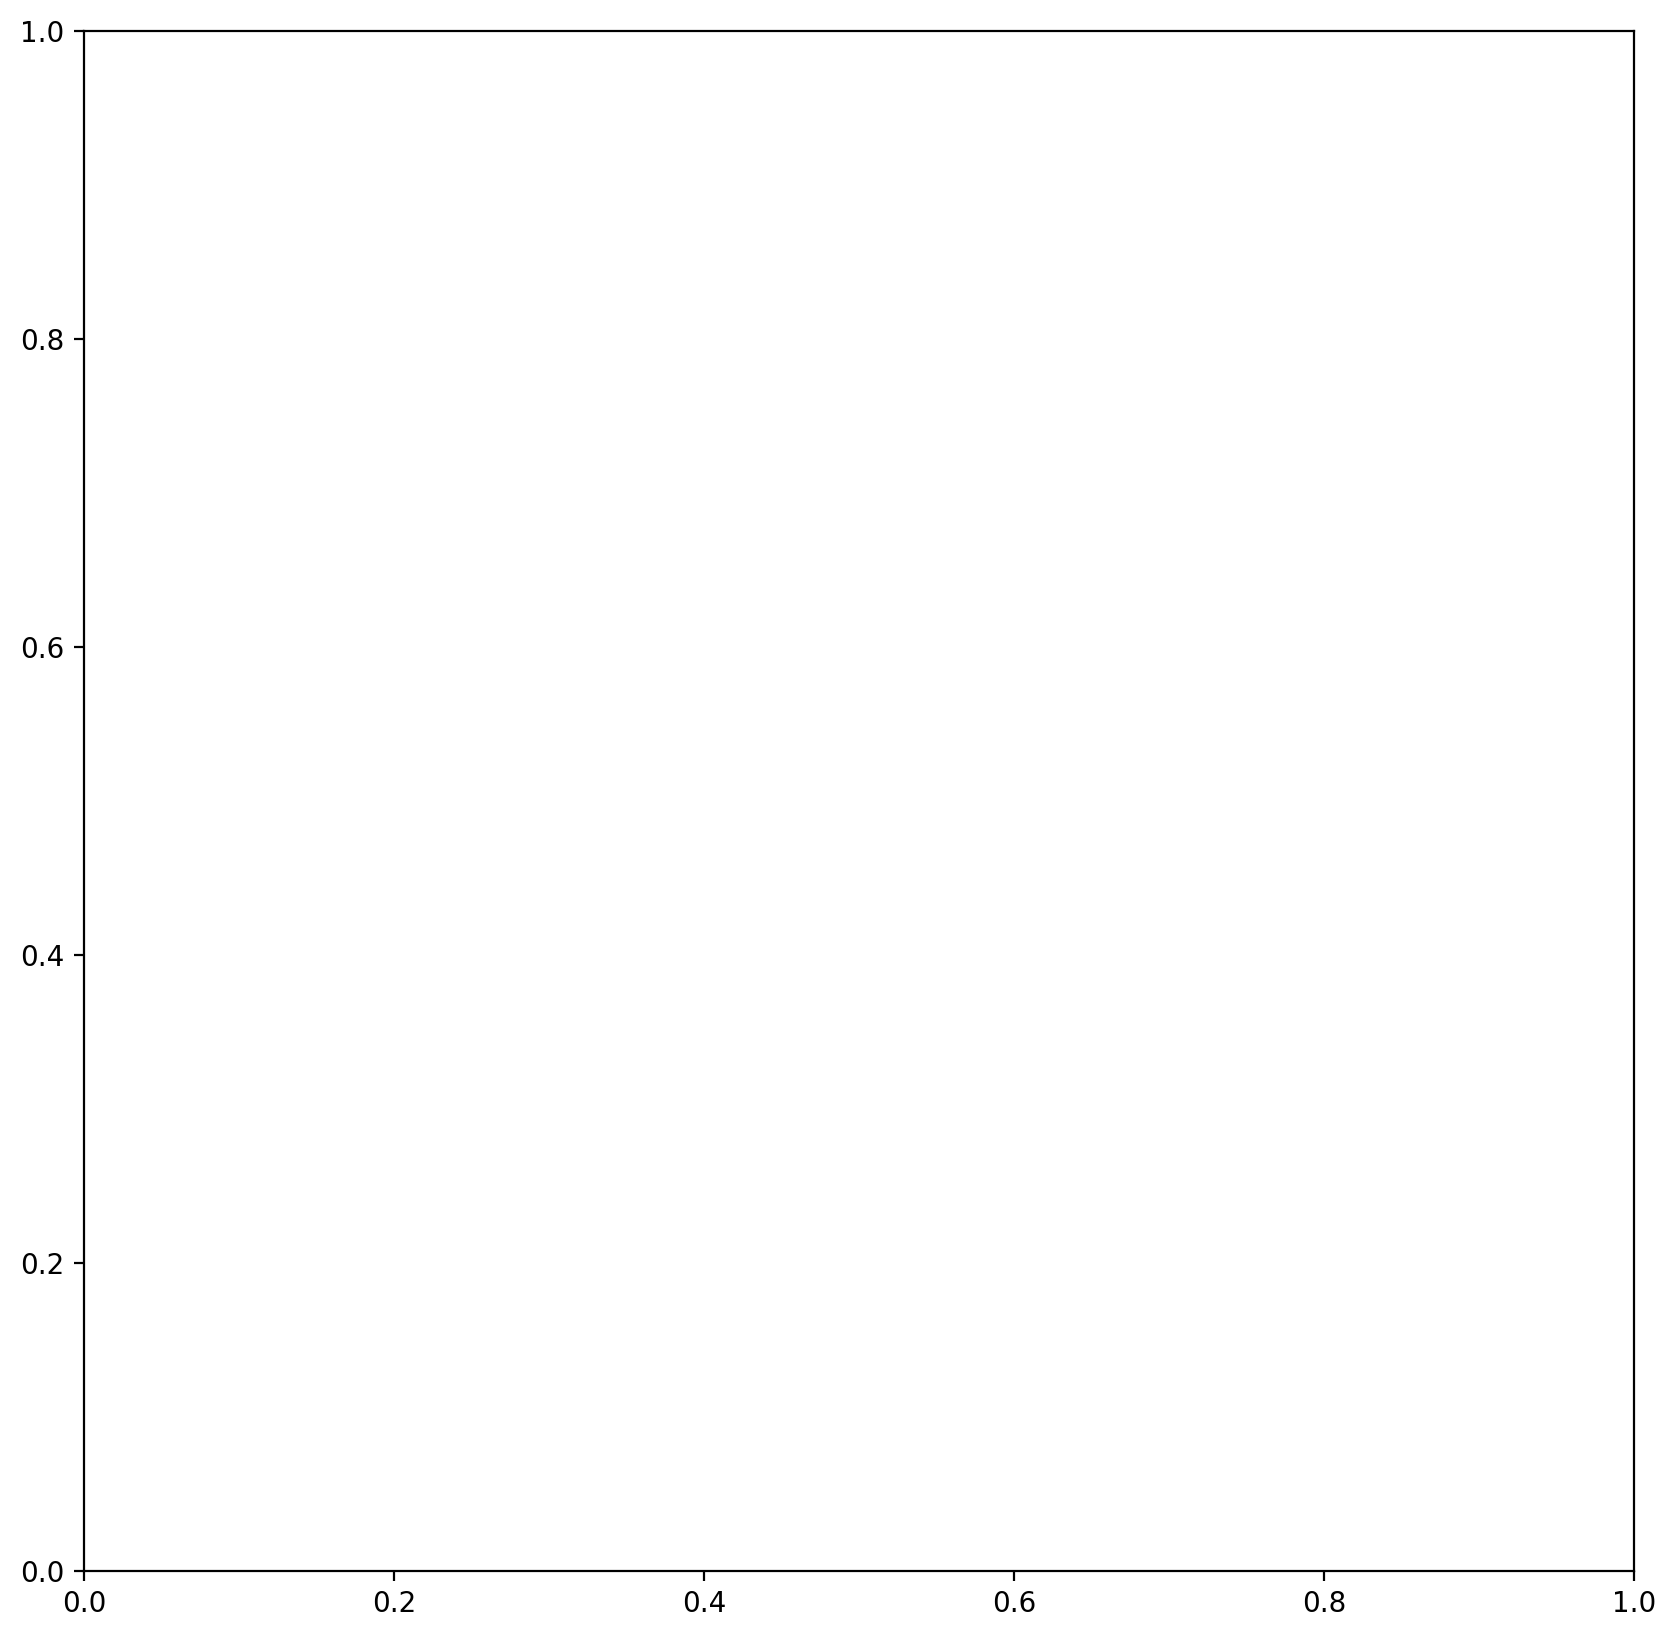

In [52]:
fig = plt.subplots(figsize = (10,10), dpi =200)
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])
offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

As you can see, there are 15 corners, 9 right turns and 6 left turns.

### Drivers comparison

In [ ]:
# Load the laps information
df = session.laps

In [ ]:
# Pick the two Drivers
yuki = df[df['Driver'] == 'TSU']
mag = df[df['Driver'] == 'MAG']

In order to compare the two different drivers, we've to extract the telemetry data 

In [ ]:
fastest_yuki = yuki.pick_fastest().get_car_data().add_distance()
fastest_mag = mag.pick_fastest().get_car_data().add_distance()

In [ ]:
print(fastest_yuki.shape)
print(fastest_mag.shape)

(352, 11)
(367, 11)


The DataFrame has different shapes but it shouldn't be a problem. The following step is to convert the Time in seconds.

In [ ]:
fastest_mag['sec'] = fastest_mag['Time'].dt.total_seconds()
fastest_yuki['sec'] = fastest_yuki['Time'].dt.total_seconds()
fastest_yuki

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance,sec
0,2024-02-21 09:43:07.651,11298,286,7,100,False,12,car,0 days 00:00:00.283000,0 days 02:47:55.892000,22.482778,0.283
1,2024-02-21 09:43:07.931,11359,289,7,100,False,12,car,0 days 00:00:00.563000,0 days 02:47:56.172000,44.960556,0.563
2,2024-02-21 09:43:08.211,11470,291,7,100,False,12,car,0 days 00:00:00.843000,0 days 02:47:56.452000,67.593889,0.843
3,2024-02-21 09:43:08.531,11519,291,7,100,False,12,car,0 days 00:00:01.163000,0 days 02:47:56.772000,93.460556,1.163
4,2024-02-21 09:43:08.891,11601,294,7,100,False,12,car,0 days 00:00:01.523000,0 days 02:47:57.132000,122.860556,1.523
...,...,...,...,...,...,...,...,...,...,...,...,...
347,2024-02-21 09:44:40.331,10697,270,7,100,False,12,car,0 days 00:01:32.963000,0 days 02:49:28.572000,5260.758611,92.963
348,2024-02-21 09:44:40.491,10835,271,7,100,False,12,car,0 days 00:01:33.123000,0 days 02:49:28.732000,5272.803056,93.123
349,2024-02-21 09:44:40.811,10965,275,7,100,False,12,car,0 days 00:01:33.443000,0 days 02:49:29.052000,5297.247500,93.443
350,2024-02-21 09:44:41.091,11023,277,7,100,False,12,car,0 days 00:01:33.723000,0 days 02:49:29.332000,5318.791944,93.723


Now that we've got the seconds we can start to plot the Data in order to analyze the two different Drivers

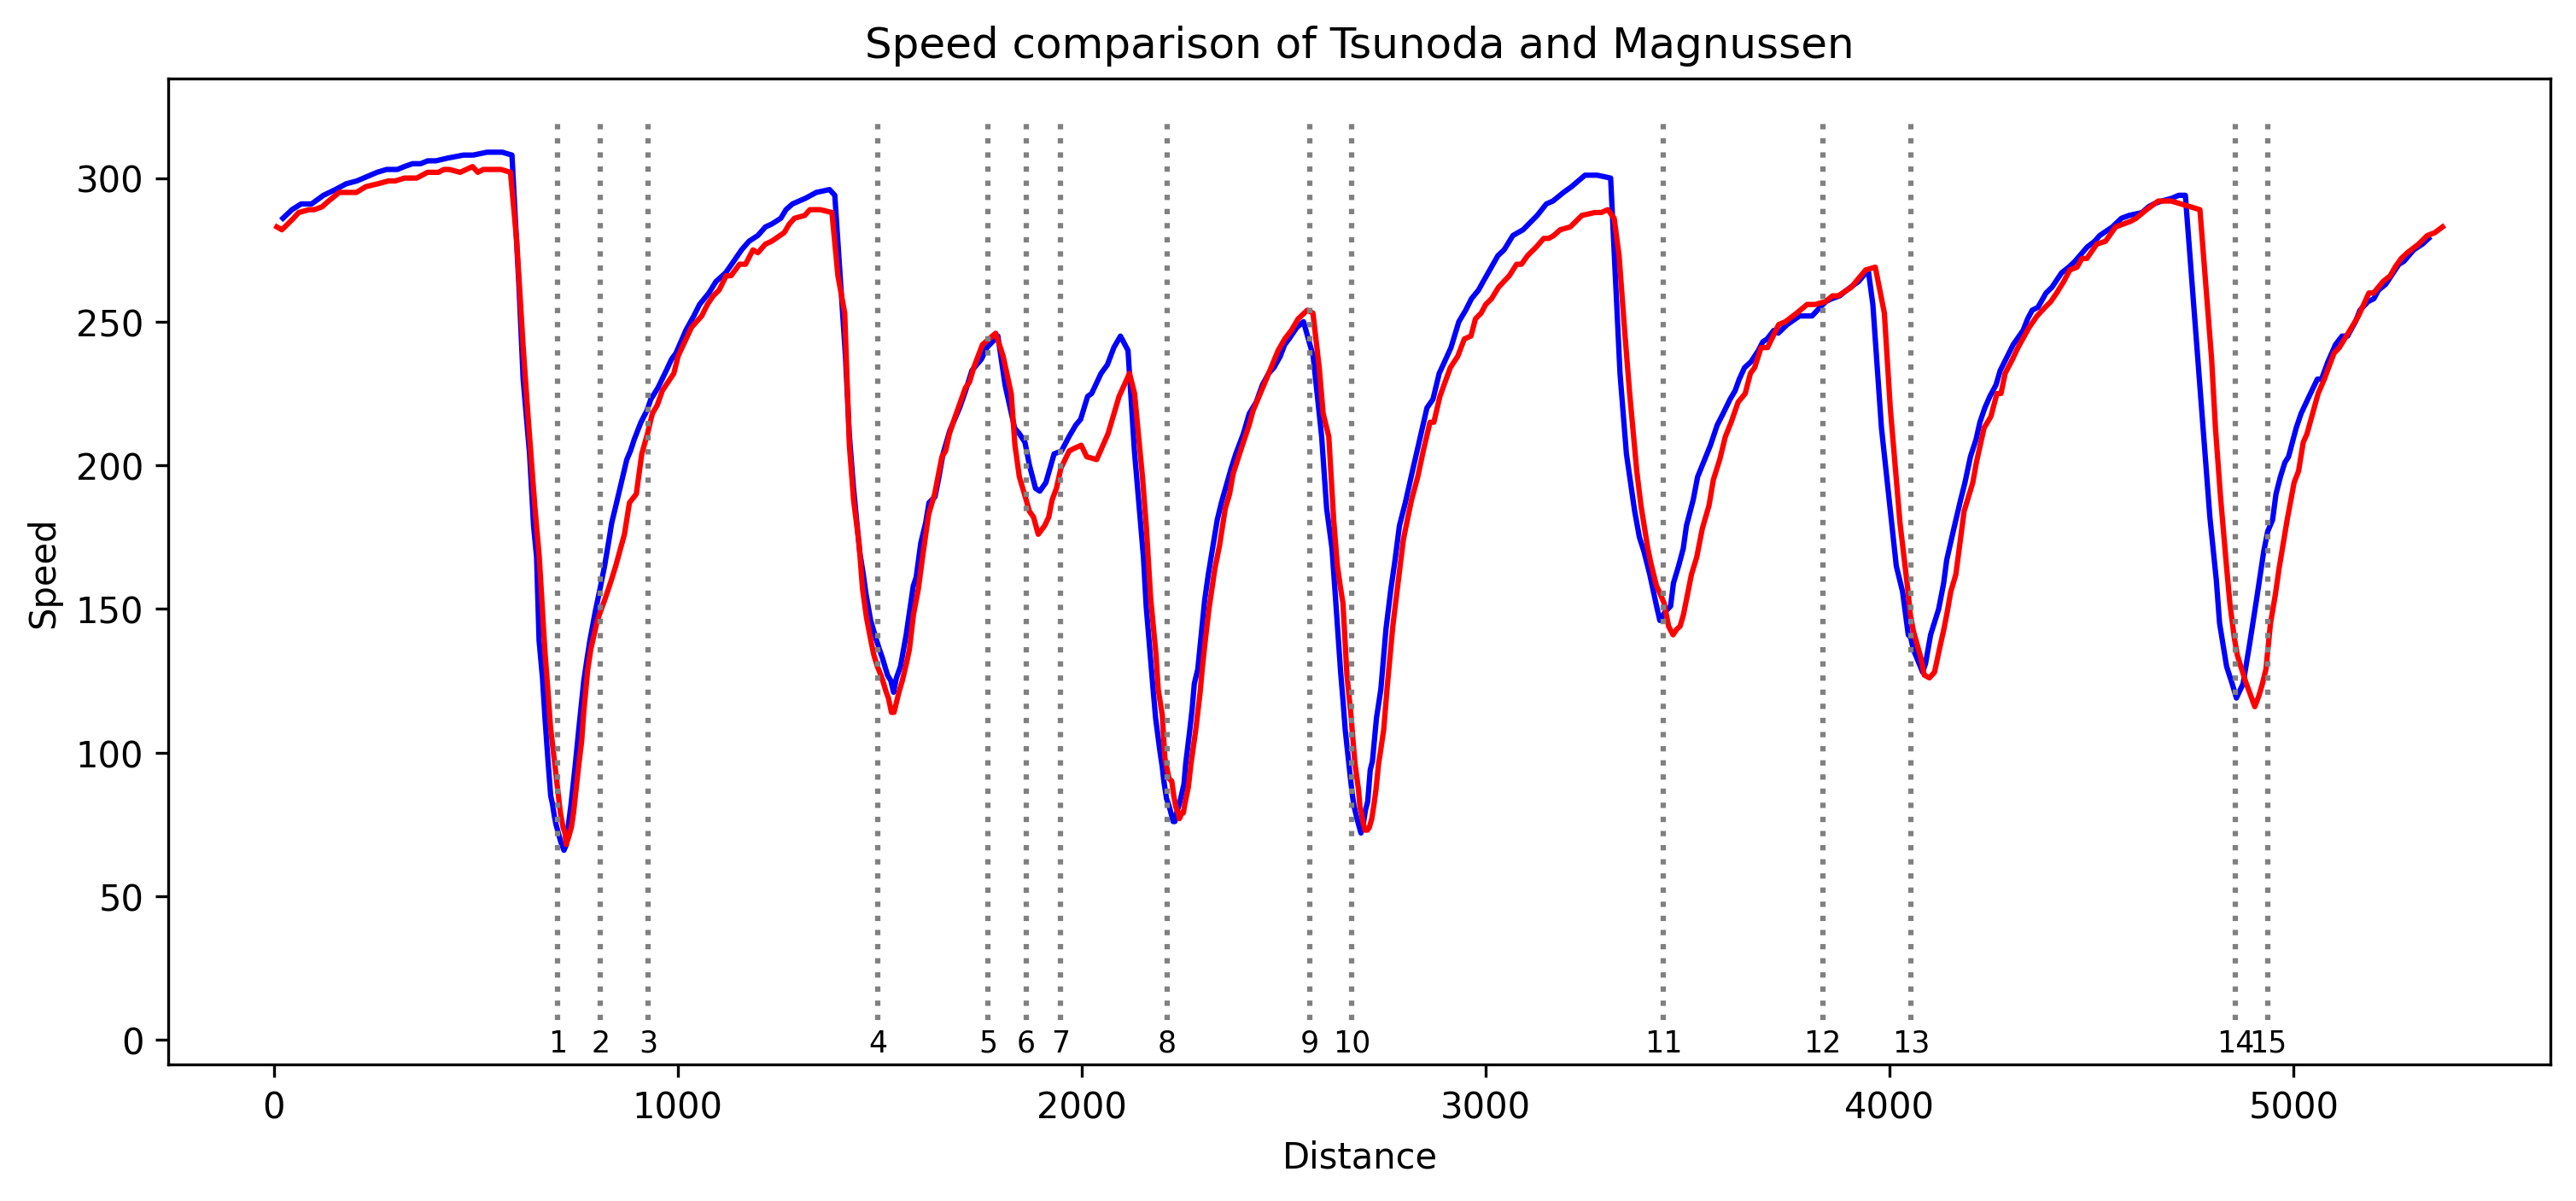

In [ ]:
fig, axs = plt.subplots(figsize=(12, 5), dpi=300)

axs.plot(fastest_yuki['Distance'], fastest_yuki['Speed'], color='blue')
axs.plot(fastest_mag['Distance'], fastest_mag['Speed'], color='red')

v_min = fastest_yuki['Speed'].min()
v_max = fastest_yuki['Speed'].max()
axs.vlines(x=circuit_info.corners['Distance'], ymin=max(v_min-100, 7), ymax=v_max+10,
           linestyles='dotted', colors='grey')

for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    axs.text(corner['Distance'], max(v_min-150, 0), txt,
             va='center_baseline', ha='center', size='small')
    plt.xlabel('Distance')
    plt.ylabel('Speed')
    plt.title('Speed comparison of Tsunoda and Magnussen')
    


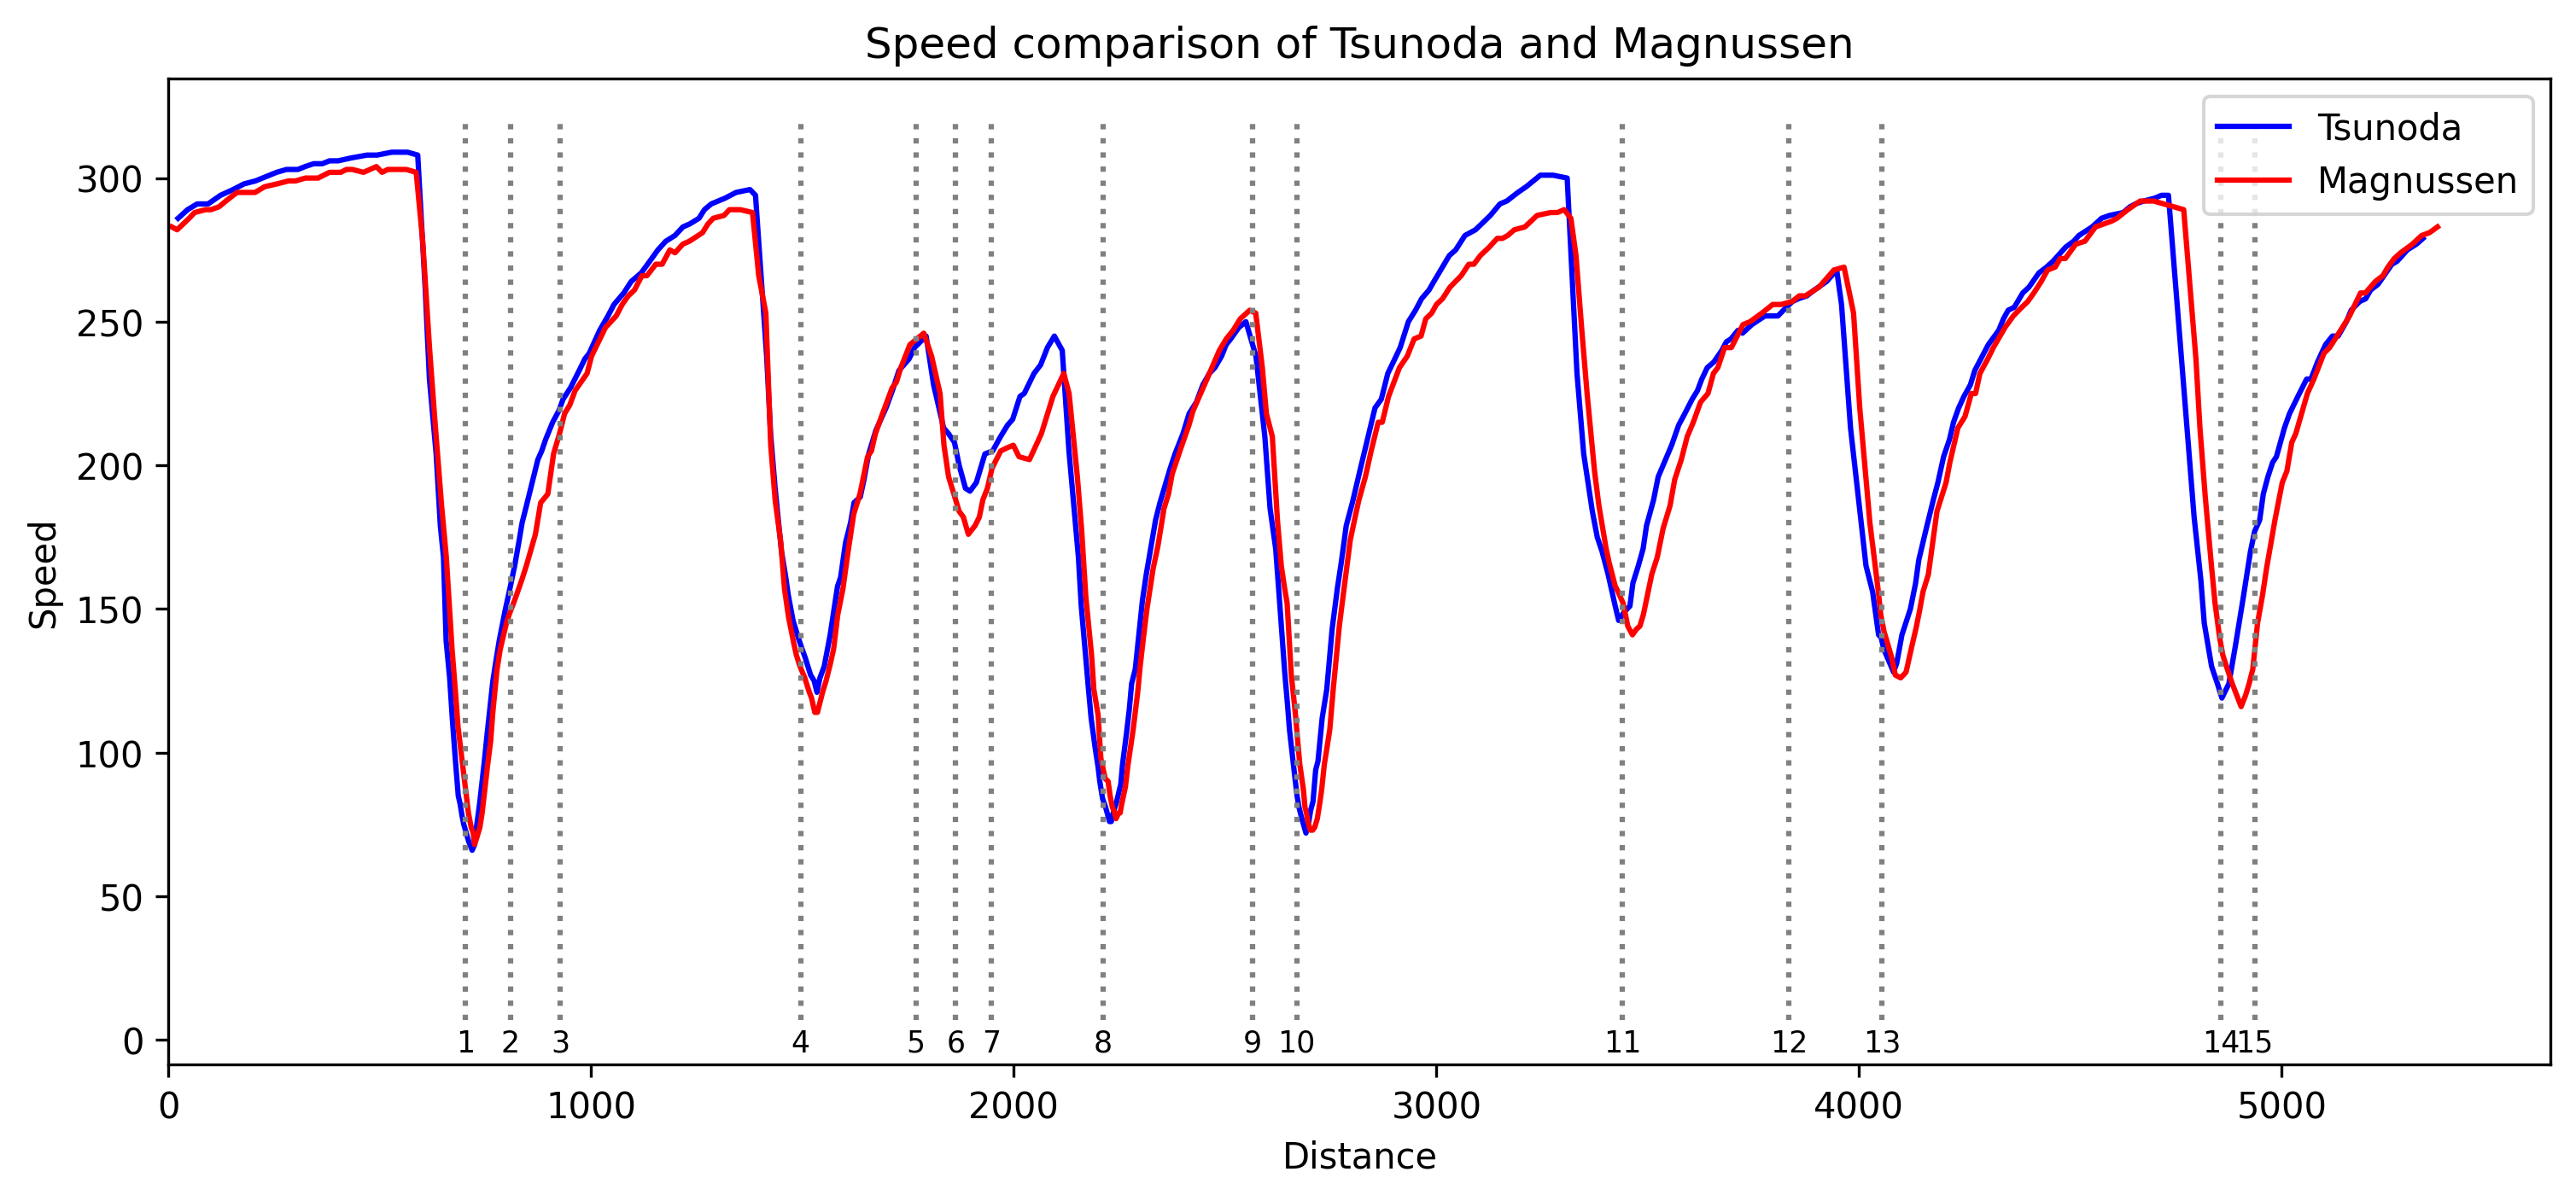

In [ ]:
fig, axs = plt.subplots(figsize=(12, 5), dpi=300)

# Plot the data for Yuki and Magnussen
axs.plot(fastest_yuki['Distance'], fastest_yuki['Speed'], color='blue', label='Tsunoda')
axs.plot(fastest_mag['Distance'], fastest_mag['Speed'], color='red', label='Magnussen')

# Plot the vertical lines
v_min = fastest_yuki['Speed'].min()
v_max = fastest_yuki['Speed'].max()
axs.vlines(x=circuit_info.corners['Distance'], ymin=max(v_min-100, 7), ymax=v_max+10,
           linestyles='dotted', colors='grey')

# Add corner labels
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    axs.text(corner['Distance'], max(v_min-150, 0), txt,
             va='center_baseline', ha='center', size='small')

# Set labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed comparison of Tsunoda and Magnussen')

# Set x-axis limit to start from 0
axs.set_xlim(left=0)

# Add legend
axs.legend()

plt.show()


As we can see the car of Magnussen struggles a lot in the high speed sections. In turn 14 and 15 Magnussen breakes late and accelerates late in the exit of the last turn (15). From turn 5 to 8 Yuki takes more speed in the corners which allows him to exit much quicker after turn 7. 

Furthermore let's investigate about the speed of the car by looking at the RPM's of the both Motors

In [ ]:
def plot_data(df_list, x_col, y_col, labels):
    fig, axs = plt.subplots(figsize=(12, 5), dpi=300)
    
    for i, df in enumerate(df_list):
        axs.plot(df[x_col], df[y_col], color='blue' if i == 0 else 'red', label=labels[i])
    
    # Assuming circuit_info is available
    v_min = min(df[y_col].min() for df in df_list)
    v_max = max(df[y_col].max() for df in df_list)
    axs.vlines(x=circuit_info.corners['Distance'], ymin=max(v_min-100, 7), ymax=v_max+10,
               linestyles='dotted', colors='grey')

    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        axs.text(corner['Distance'], max(v_min-150, 0), txt,
                 va='center_baseline', ha='center', size='small')
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Comparison of {y_col} between drivers')
    axs.set_xlim(left=0)
    axs.legend()
    plt.show()


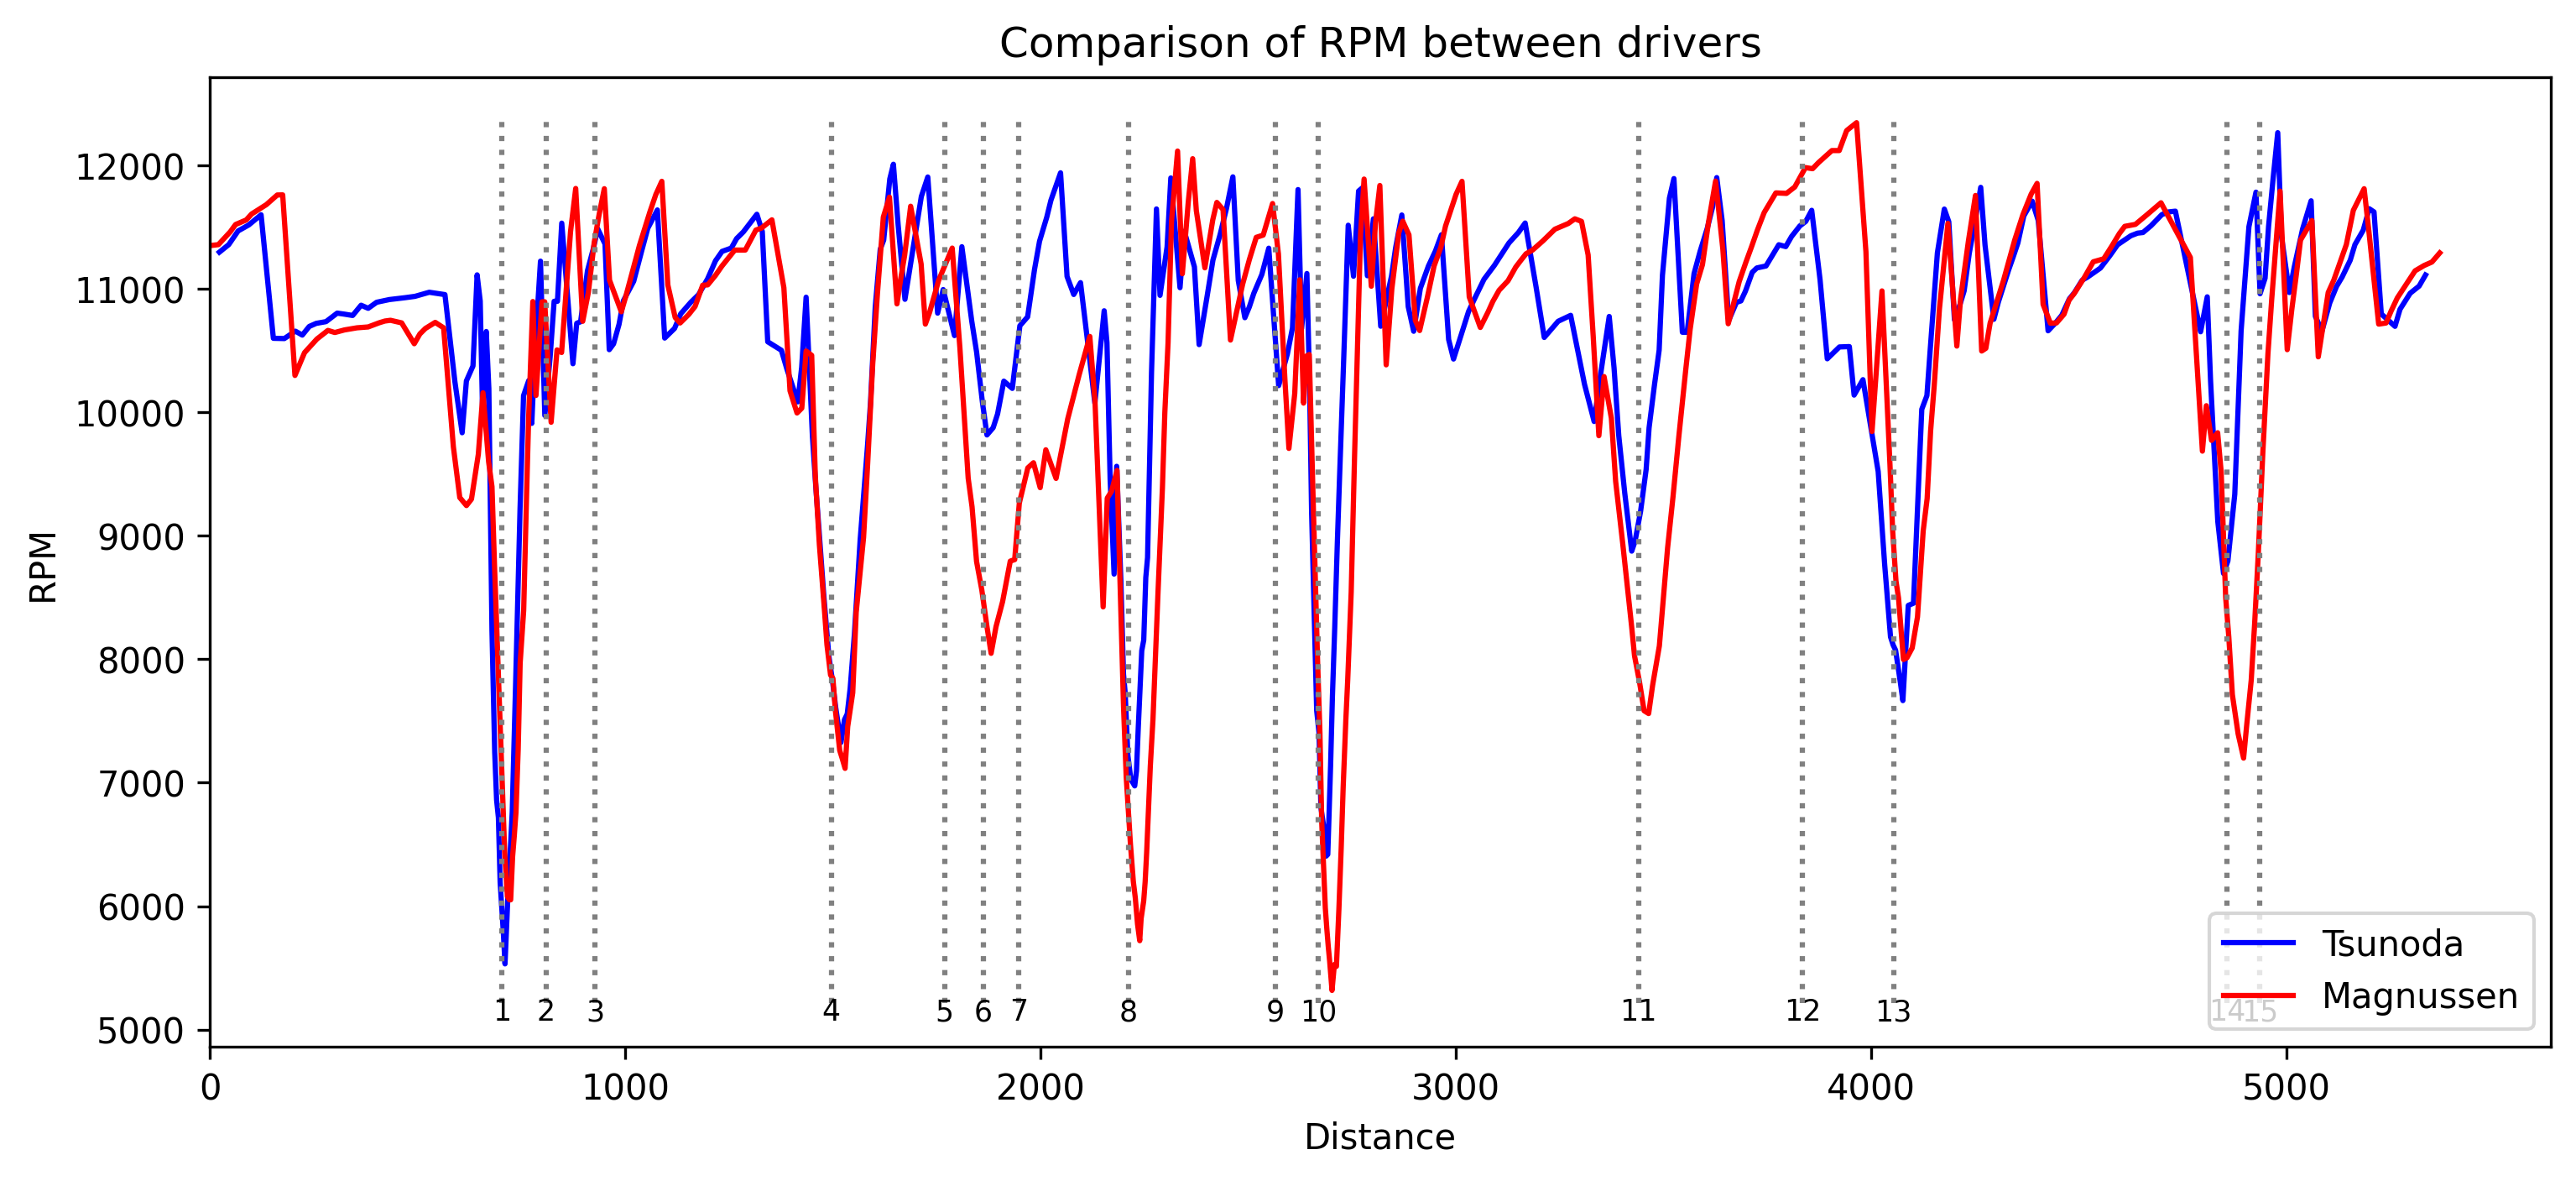

In [ ]:
plot_data([fastest_yuki, fastest_mag], 'Distance', 'RPM', ['Tsunoda', 'Magnussen'])


In the RPM's there are huge differences as you can see. First of all at first sight the RPM's of the Haas seem to have a bigger oscilation over the whole lap. Especially the difference in the spikes in turn 8, 10 and 11 are pretty big. Personally the most interesting part comes at turn 6 to 8 where the graph is totally different. 

### Day 2

For the second day I'll pick Leclerc and Hamilton.With the opening practice session completed, teams and drivers have had a chance to analyze their performance and make adjustments for the second day. While yesterday provided some initial insights, today's session will be crucial in refining strategies and car setups for the upcoming qualifying and race. Both drivers displayed impressive pace yesterday, with Leclerc topping the timesheets and Hamilton showcasing consistent speed throughout the session. Their rivalry is sure to continue heating up, making them exciting contenders to watch. 

However, it's important to remember that practice sessions can be deceptive. Teams often run different configurations and fuel loads, making it difficult to predict the true pace hierarchy. We can expect to see a more intense battle unfold when the drivers push for pole position in qualifying, and ultimately, during the race itself.

Therefore, while Leclerc and Hamilton are my current picks, the second practice session and qualifying will hold the key to revealing the true front-runners for the first race of the 2024 season.

In [ ]:
session2 = fastf1.get_testing_session(2024, 1, 2)
session2.load()

core           INFO 	Loading data for Pre-Season Testing - Practice 2 [v3.2.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 1
core        WARNING 	No lap data for driver 23
core        WARNING 	No lap data for driver 63
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 1)
core        WARNING 	Driver 11: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 63)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            I

In [ ]:
fastf1.Cache.offline_mode(enabled=True)

In [ ]:
df2 = session2.laps
df2

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:13:45.598000,SAR,2,NaT,1.0,1.0,0 days 00:11:54.520000,NaT,NaT,0 days 00:00:43.007000,...,False,Williams,0 days 00:11:54.520000,2024-02-22 07:00:24.609,1,NaN,False,,False,False
1,0 days 00:15:30.176000,SAR,2,0 days 00:01:44.578000,2.0,1.0,NaT,0 days 00:15:28.393000,0 days 00:00:35.287000,0 days 00:00:42.635000,...,False,Williams,0 days 00:13:45.598000,2024-02-22 07:02:15.687,1,NaN,False,,False,False
2,0 days 00:24:20.384000,SAR,2,NaT,3.0,2.0,0 days 00:22:23.928000,NaT,NaT,0 days 00:00:48.354000,...,True,Williams,0 days 00:15:30.176000,2024-02-22 07:04:00.265,1,NaN,False,,False,False
3,0 days 00:25:53.945000,SAR,2,0 days 00:01:33.561000,4.0,2.0,NaT,NaT,0 days 00:00:29.787000,0 days 00:00:40.364000,...,True,Williams,0 days 00:24:20.384000,2024-02-22 07:12:50.473,1,NaN,False,,False,True
4,0 days 00:28:01.424000,SAR,2,0 days 00:02:07.479000,5.0,2.0,NaT,NaT,0 days 00:00:39.472000,0 days 00:01:00.653000,...,True,Williams,0 days 00:25:53.945000,2024-02-22 07:14:24.034,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,0 days 02:26:31.284000,PIA,81,0 days 00:01:39.657000,31.0,8.0,NaT,NaT,0 days 00:00:31.883000,0 days 00:00:43.274000,...,False,McLaren,0 days 02:24:51.627000,2024-02-22 09:13:21.716,1,NaN,False,,False,True
1215,0 days 02:28:11.656000,PIA,81,0 days 00:01:40.372000,32.0,8.0,NaT,NaT,0 days 00:00:32.247000,0 days 00:00:43.374000,...,False,McLaren,0 days 02:26:31.284000,2024-02-22 09:15:01.373,1,NaN,False,,False,True
1216,0 days 02:29:51.640000,PIA,81,0 days 00:01:39.984000,33.0,8.0,NaT,NaT,0 days 00:00:32.030000,0 days 00:00:43.355000,...,False,McLaren,0 days 02:28:11.656000,2024-02-22 09:16:41.745,1,NaN,False,,False,True
1217,0 days 02:31:31.701000,PIA,81,0 days 00:01:40.061000,34.0,8.0,NaT,NaT,0 days 00:00:32.078000,0 days 00:00:43.210000,...,False,McLaren,0 days 02:29:51.640000,2024-02-22 09:18:21.729,1,NaN,False,,False,True


In [ ]:
laps_per_driver = df.groupby('Driver').size().sort_values()
laps_per_team  = df.groupby('Team').size().sort_values()

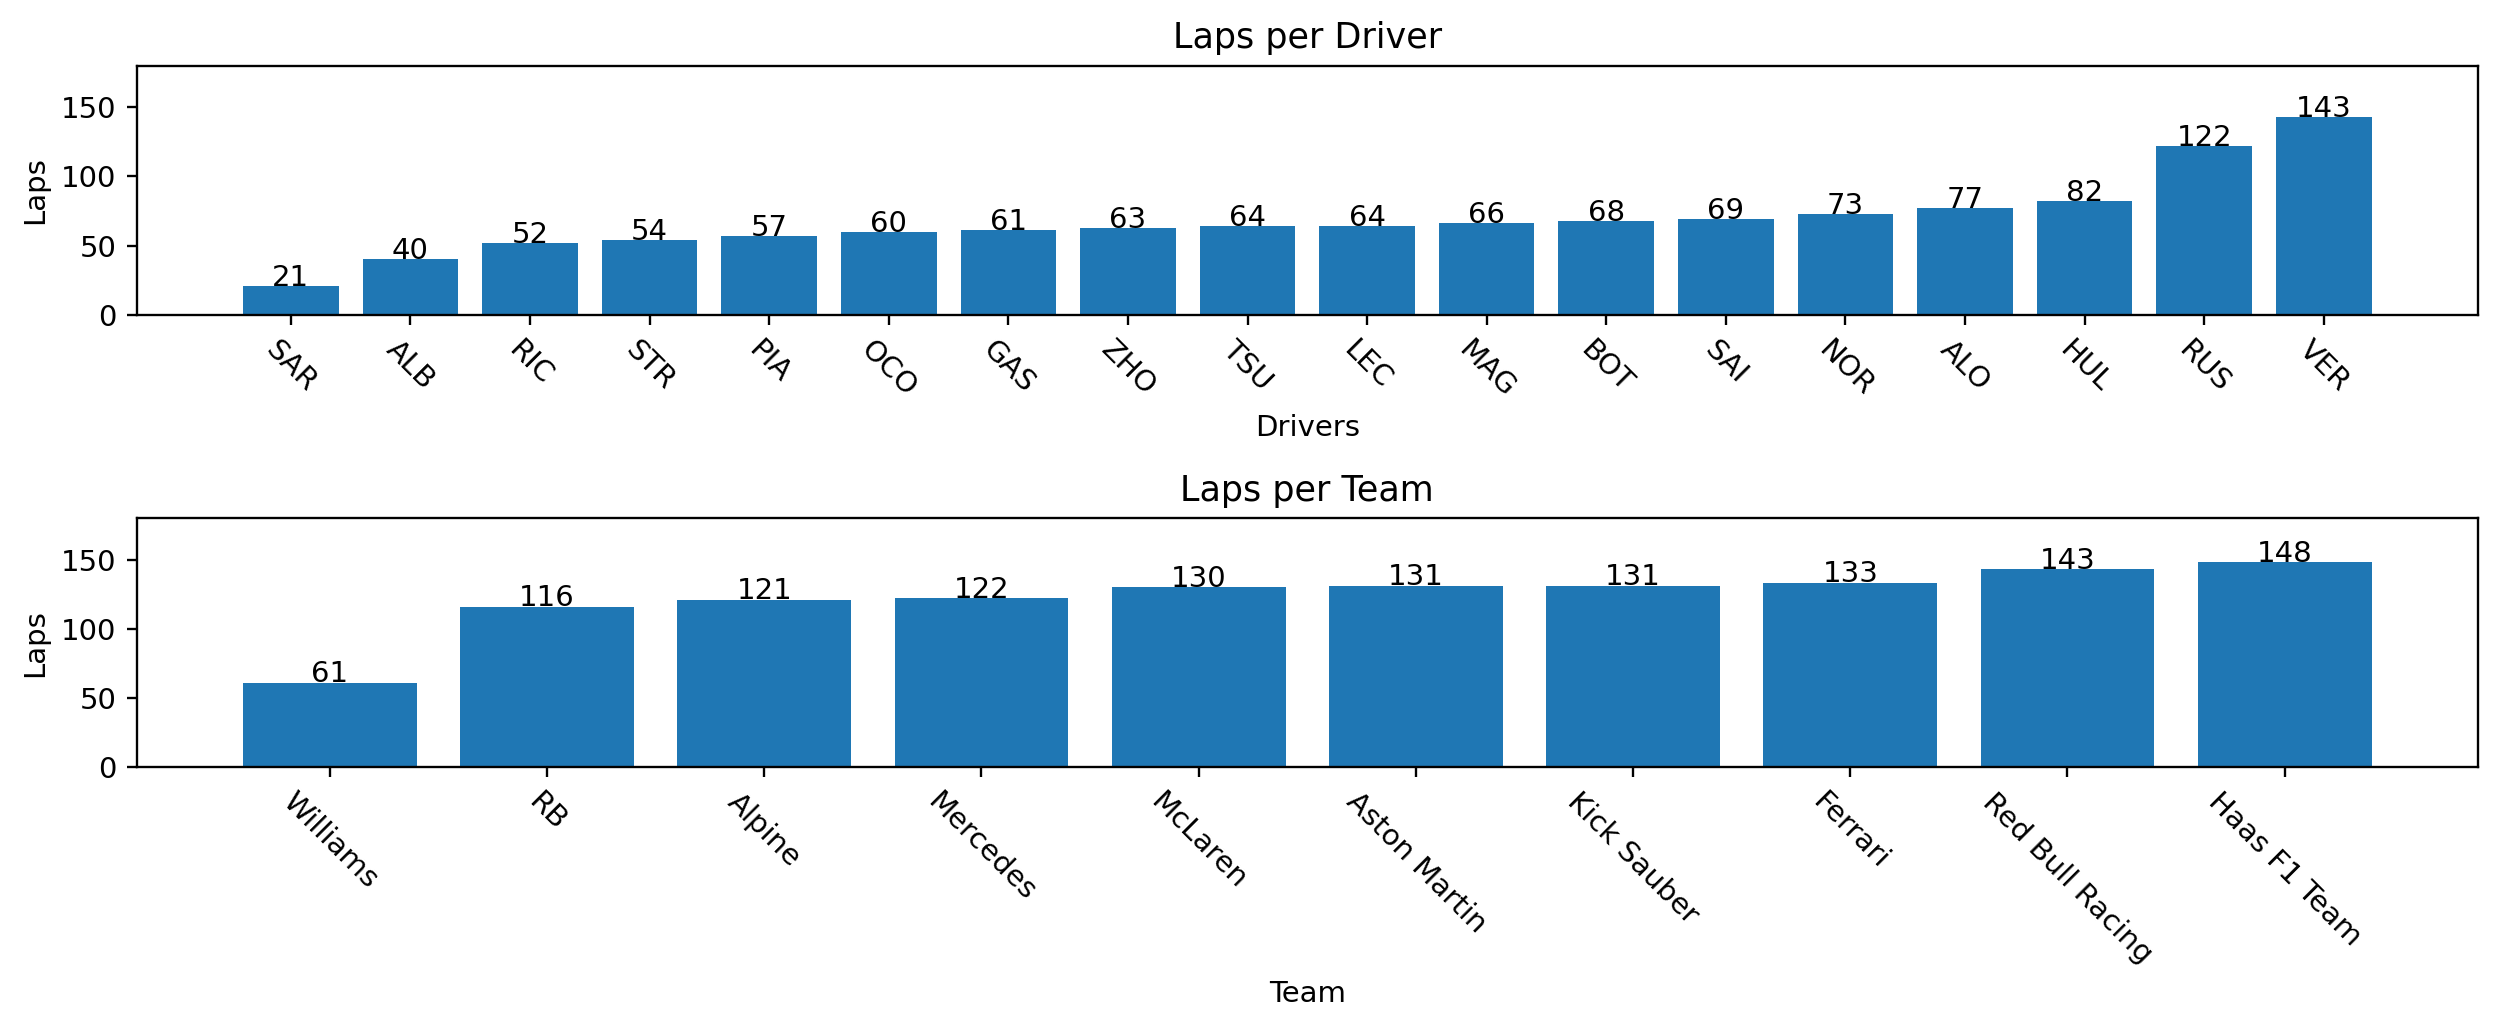

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 5), dpi=210)

bars = axes[0].bar(laps_per_driver.index, laps_per_driver.values)  
bars1 = axes[1].bar(laps_per_team.index, laps_per_team.values)

for bar, value in zip(bars, laps_per_driver.values):
    y_pos = bar.get_height() 
    text_pos = y_pos
    axes[0].text(bar.get_x() + bar.get_width() / 2, text_pos, str(value), ha='center') 

axes[0].set_xlabel('Drivers')
axes[0].set_ylim(0, 180) 
axes[0].set_ylabel('Laps')
axes[0].set_title('Laps per Driver')
axes[0].tick_params(axis='x', rotation=-45)


for bar, value in zip(bars1, laps_per_team.values):
    y_pos = bar.get_height() 
    text_pos = y_pos + 0.6
    axes[1].text(bar.get_x() + bar.get_width()/2 , text_pos, str(value), ha='center') 
    
axes[1].set_xlabel('Team')
axes[1].set_ylim(0, 180) 
axes[1].set_ylabel('Laps')
axes[1].set_title('Laps per Team')
axes[1].tick_params(axis='x', rotation=-45)

plt.tight_layout()
plt.show()


As you can see, Sargeant and Albon did the least laps. Verstappen did the most laps on the second day.

In [ ]:
ham = df2[df2['Driver'] == 'HAM']
lec = df2[df2['Driver'] == 'LEC']

In [ ]:
ham.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [ ]:
ham.groupby('Compound').size()
lec.groupby('Compound').size()

Compound
MEDIUM    54
dtype: int64

In [ ]:
import plotly

In [ ]:
import plotly.graph_objs as go

def plot_data(df_list, x_col, y_col, labels):
    fig = go.Figure()

    for i, df in enumerate(df_list):
        fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='lines', name=labels[i],
                                 line=dict(color='blue' if i == 0 else 'red')))
    
    # Assuming circuit_info is available
    v_min = min(df[y_col].min() for df in df_list)
    v_max = max(df[y_col].max() for df in df_list)
    
    for _, corner in circuit_info.corners.iterrows():
        txt = f"{corner['Number']}{corner['Letter']}"
        fig.add_annotation(x=corner['Distance'], y=max(v_min-150, 0), text=txt,
                           showarrow=False, font=dict(size=10))
    
    fig.update_layout(
        xaxis=dict(title=x_col),
        yaxis=dict(title=y_col),
        title=f'Comparison of {y_col} between drivers',
        legend=dict(title='Driver'),
        hovermode='closest',
        showlegend=True,
        hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell")
    )

    fig.show()
